<a href="https://colab.research.google.com/github/cescudero27/4220-Data-Mining-Machine-Learning/blob/main/Escudero_Lab3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset-1:** This part of the lab will use a linearly separable dataset.

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed

**Step-2: Load the Data:** The next step is to load the data. In this part, we will generate some data points and use them as our dataset. We will use the make_blobs function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

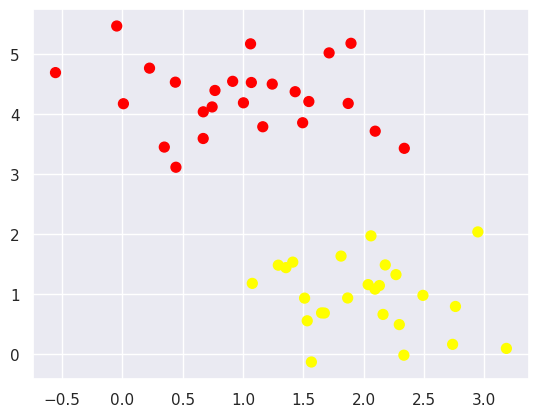

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

**Step-3: Train SVC Model:** This is linrealy separable data. We do not need to use a polynomial or RBF kernel.

In [3]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Let's print our support vectors

In [4]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

To have a better visualization, let's plot the data, the support vectors, and see the classifier line. We will implement a function for that purpose.

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() #create a new axis if there is no axis in the fig.
    xlim = ax.get_xlim() #if there is an axis, get the x-axis limit
    ylim = ax.get_ylim() #if there is an axis, get the x-axis limit

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape) #Evaluate the decision function for the samples in xy.

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Now, let's call this function.

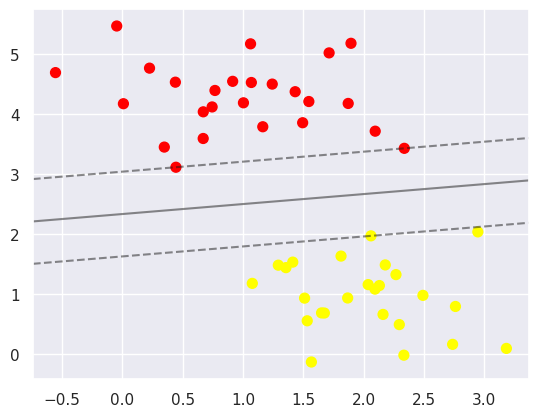

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

If you want to test the model, use model.predict

In [7]:
y == model.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

Now, let's manually vary C and see what happens

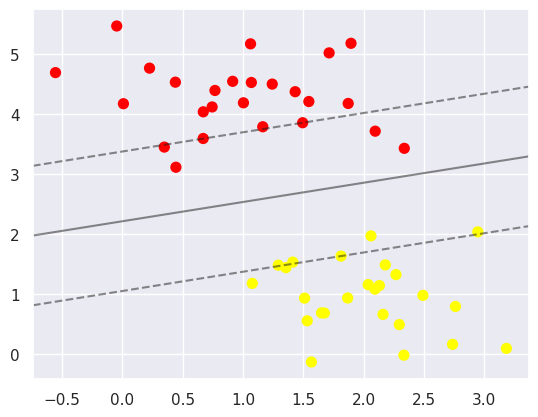

In [8]:
model2 = SVC(kernel='linear', C=0.1)
model2.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model2)

As you can see the support vectors have changed and so the classifier.

**Dataset-2:** This part of the lab will use a non-linearly separable dataset.

**Step-2: Load the Data:** In this part, we will generate some data points and use them as our dataset. We will use the make_circles function: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

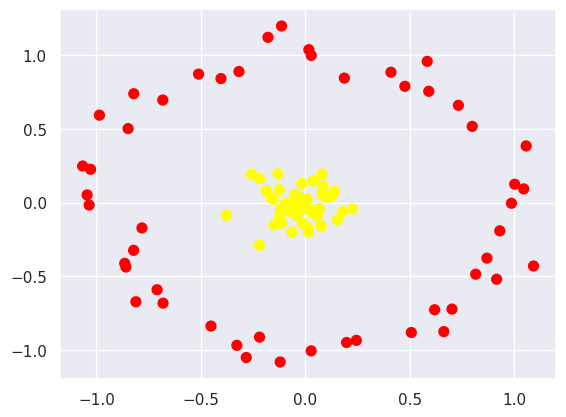

In [9]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

**Step-3: Train SVM Model:** This is non-linrealy separable data. Let's see if we can separate the two classes using a linear classifier.

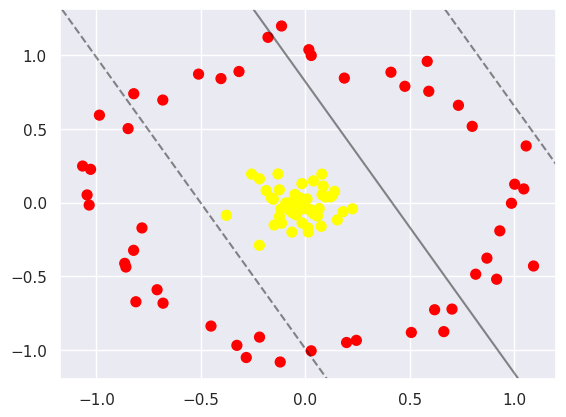

In [10]:
clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [11]:
y == clf.predict(X)

array([False, False, False,  True,  True,  True, False,  True,  True,
        True,  True,  True, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False,  True,
        True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False])

So many misclassifactions!!

Let's see what happens when an RBF kernel function is applied to the data.

In [12]:
r = np.exp(-(X ** 2).sum(1))

Let's plot the data after applying the RBF kernel:

interactive(children=(Dropdown(description='elev', options=(-150, 150), value=-150), IntSlider(value=30, descr…

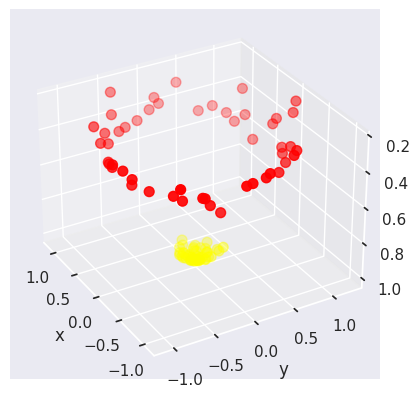

In [13]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-150,150], azip=(-180,180),
         X=fixed(X), y=fixed(y));

As you can see, data now can be separated into two different planes. The r-axis should be reversed though (i.e, minimum "0.2" at buttom and maximum "1.0" at top) such that the yellow circles are shown on top plane and red circles are shown in the bottom plane. I could not find the correct rotation for elev and azip angles to make the plot. But the idea is still clear: the two classes are separated into two different planes. Let's implement a classifier that can separate the two classes.

We will use SVC fucntion with kernel defined as rbf:

In [14]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

Let's plot the decision boundary and support vectors

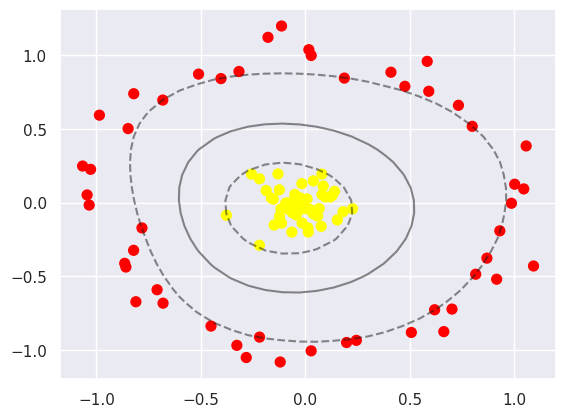

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

# **START OF LAB 3 USING DATASET 3**


# **STEP 1: IMPORT LIBRARIES**


In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# **STEP 2: LOAD AND PROCESS THE DATASET:**

**2(a)**

Loads the data in

In [17]:
data = pd.read_csv('Dataset.csv')

Print and report the shape of the data

In [18]:
print(data)
print("Our data has a shape of: ")
data.shape

      Xtrain  Unnamed: 1  ytrain  ytest     Xtest  Unnamed: 5
0   -0.15899     0.42398       1    0.0 -0.353060    -0.67390
1   -0.34793     0.47076       1    1.0 -0.227130     0.44732
2   -0.50461     0.35380       1    0.0  0.092898    -0.75352
3   -0.59677     0.11403       1    0.0  0.148240    -0.71847
4   -0.51843    -0.17252       1    0.0 -0.001512     0.16293
..       ...         ...     ...    ...       ...         ...
206 -0.39988    -0.62193       1    NaN       NaN         NaN
207 -0.12408    -0.12661       1    NaN       NaN         NaN
208 -0.31694    -0.22895       1    NaN       NaN         NaN
209 -0.29412    -0.13479       0    NaN       NaN         NaN
210 -0.15311     0.18450       0    NaN       NaN         NaN

[211 rows x 6 columns]
Our data has a shape of: 


(211, 6)

**2(b)**

Extract the features X_train and labels y_train and test features X_test and labels y_test

In [19]:
#converting to numpy array and checking data
data= data.to_numpy()
print(data)
print("Our data has a shape of: ")
data.shape

[[-0.15899   0.42398   1.        0.       -0.35306  -0.6739  ]
 [-0.34793   0.47076   1.        1.       -0.22713   0.44732 ]
 [-0.50461   0.3538    1.        0.        0.092898 -0.75352 ]
 ...
 [-0.31694  -0.22895   1.             nan       nan       nan]
 [-0.29412  -0.13479   0.             nan       nan       nan]
 [-0.15311   0.1845    0.             nan       nan       nan]]
Our data has a shape of: 


(211, 6)

In [20]:
#Feature extraction
X_train= data[:,:2]
y_train= data[:,2]

X_test= data[:200,4:6]
y_test= data[:200,3]

#printing to look at data
print("X train: ",X_train[:5])
print("Y train: ", y_train[:5])
print("X test: ", X_test[:5])
print("y test: ", y_test[:5])

X train:  [[-0.15899  0.42398]
 [-0.34793  0.47076]
 [-0.50461  0.3538 ]
 [-0.59677  0.11403]
 [-0.51843 -0.17252]]
Y train:  [1. 1. 1. 1. 1.]
X test:  [[-0.35306   -0.6739   ]
 [-0.22713    0.44732  ]
 [ 0.092898  -0.75352  ]
 [ 0.14824   -0.71847  ]
 [-0.0015125  0.16293  ]]
y test:  [0. 1. 0. 0. 0.]


**2(c)**

Generate a scatter plot of the train data

In [21]:
#plotData function from Lab2 step 2
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1

    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

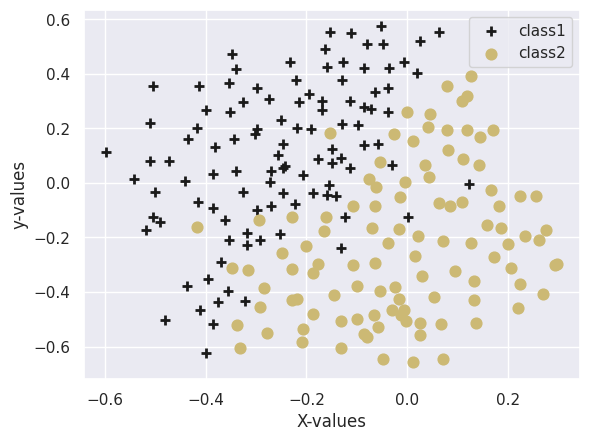

In [22]:
plotData(data,'X-values', 'y-values', 'class1', 'class2')

**Do you think a linear SVC can be used to classify this data?**

 A linear SVC could classify this data, abeit there would be  misclassifications but that might work in our favor to make the model more robust

# **Step-3: SVM Train and Hyper-parameter Optimization:**

**3(a) Define the model**

In [23]:
model3 = SVC(kernel='linear', C=1E10)

3(b) Define cv, create cross fold validation data

In [24]:
cv =RepeatedKFold(n_splits=5, n_repeats=3, random_state =1)
cv.get_n_splits(X_train,y_train)

print(cv)

for i, (train_index, test_index) in enumerate(cv.split(X_train)):
  print(f"Fold {i}:")
  print(f"  Train: index={train_index[:5]}")
  print(f"  Test:  index={test_index[:5]}")


RepeatedKFold(n_repeats=3, n_splits=5, random_state=1)
Fold 0:
  Train: index=[0 1 2 3 5]
  Test:  index=[ 4 11 16 18 27]
Fold 1:
  Train: index=[0 1 2 3 4]
  Test:  index=[ 5 14 17 19 39]
Fold 2:
  Train: index=[0 1 3 4 5]
  Test:  index=[ 2  6 12 13 21]
Fold 3:
  Train: index=[1 2 4 5 6]
  Test:  index=[ 0  3  9 10 15]
Fold 4:
  Train: index=[0 2 3 4 5]
  Test:  index=[ 1  7  8 20 22]
Fold 5:
  Train: index=[0 1 2 3 6]
  Test:  index=[ 4  5  7  8 10]
Fold 6:
  Train: index=[0 1 3 4 5]
  Test:  index=[ 2  6 18 28 35]
Fold 7:
  Train: index=[0 2 4 5 6]
  Test:  index=[ 1  3 11 13 22]
Fold 8:
  Train: index=[1 2 3 4 5]
  Test:  index=[ 0  9 12 14 16]
Fold 9:
  Train: index=[0 1 2 3 4]
  Test:  index=[15 19 24 32 34]
Fold 10:
  Train: index=[0 1 3 4 5]
  Test:  index=[ 2  6  8 10 13]
Fold 11:
  Train: index=[2 3 4 5 6]
  Test:  index=[ 0  1 11 14 26]
Fold 12:
  Train: index=[0 1 2 3 4]
  Test:  index=[15 17 18 22 32]
Fold 13:
  Train: index=[0 1 2 4 6]
  Test:  index=[ 3  5  7  9 27]
Fol

**3(c) Define a search space for hyper parameters**

In [25]:
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

**3(d) Define your search using RandomizedSearchCV**

In [26]:
search = RandomizedSearchCV(model3, tuned_parameters,n_iter=16, scoring='accuracy',cv=cv,random_state=1)

**3(e) Execute the search using train data (X_train and y_train) and report the best hyper parameter**

In [27]:
#execute search
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=16. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score: 0.9225913621262459
Best Hyperparameters: {'kernel': 'linear', 'C': 10}


**3(e) pt2 Do these choices make sense given how your train data look
like?**

They do because when looking at the training data, we see that we can linearly separate it. There are going to be misclassifications but that will work in our favor to make the model more robust

**3(f) Re-train your model using the optimal hyper-parameters and entire train data**

In [28]:
#redefining our models using the best parameters from above
model3 =SVC(kernel='linear', C=10)
model3.fit(X_train, y_train)

SVC(C=10, kernel='linear')

**3(g) Plot the support vectors and decision boundary for the trained SVM model**

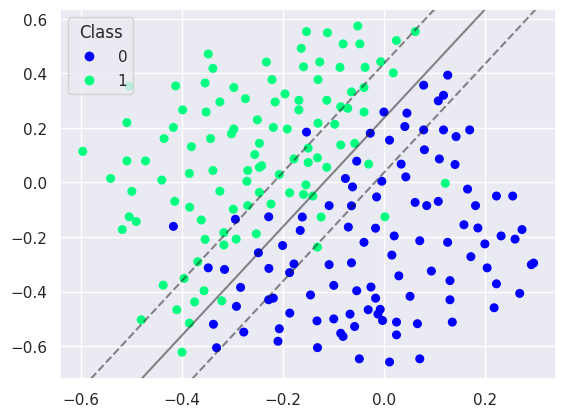

In [29]:
scatter =plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train, s=30, cmap='winter')
plot_svc_decision_function(model3)
plt.legend(*scatter.legend_elements() ,loc="upper left",title ="Class")


# **Step-4: Test the SVM Model:**

**4(a) Use the trained model to predict the classes of the test features**

In [30]:
y_pred = model3.predict(X_test)

**4(b) Use the classification_report function to report the performance metrics of your trained mode**

In [31]:
print(classification_report(y_test,y_pred, target_names=['class0','class1']))

              precision    recall  f1-score   support

      class0       0.92      0.96      0.94       113
      class1       0.95      0.90      0.92        87

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



**4(b) pt2 Comment on your results**

Since the F-1 Score and honestly the two scores look great. This is our optimal model and it would do a great job at classifying